In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
import os
import matplotlib.pyplot as plt
# !pip install opencv-python
import cv2


# 각 클래스 별로 30개씩 뽑아오기

In [17]:
# 데이터 경로 설정
data = []
label = []

for i in range(5):
    data_dir = f"C:/Users/KOREAVC/Downloads/osteoarthritis/train/{i}"  # for문 여기부터
    categories = ['train','test','val'] #  전처리 된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 샘플 이미지 시각화
    for j in range(30):
        img_name = os.listdir(data_dir)[j]  # for문 여기부터
        img_path = os.path.join(data_dir,img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        data.append(img)
        label.append(i)
        
        # plt.imshow(img,cmap='gray')
        # plt.title(f"osteoarthritis 43")
        # plt.show()
# np.array(data)
# img_name2 = os.listdir(data_dir)[0][1]
img_name

'9225592L.png'

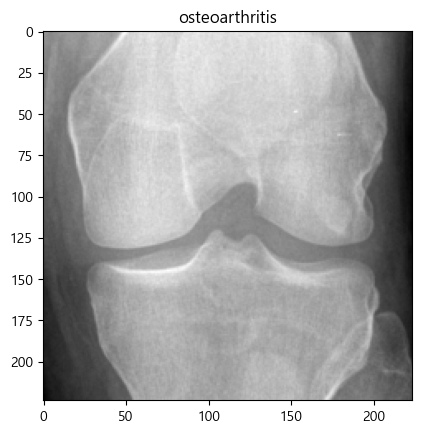

In [4]:
plt.imshow(data[4],cmap='gray')
plt.title(f"osteoarthritis")
plt.show()

crop

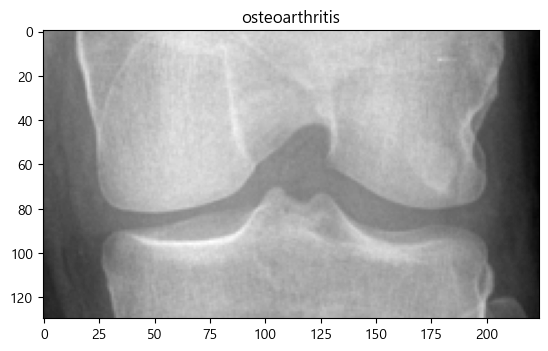

In [5]:
def crop_img(img):
    crop_img = img[50:180,:]#슬라이싱
    return crop_img

crop = crop_img(data[4])
cv2.imshow("Cropped Image", crop)
plt.imshow(crop,cmap='gray')
plt.title(f"osteoarthritis")
plt.show()

image level 평활화

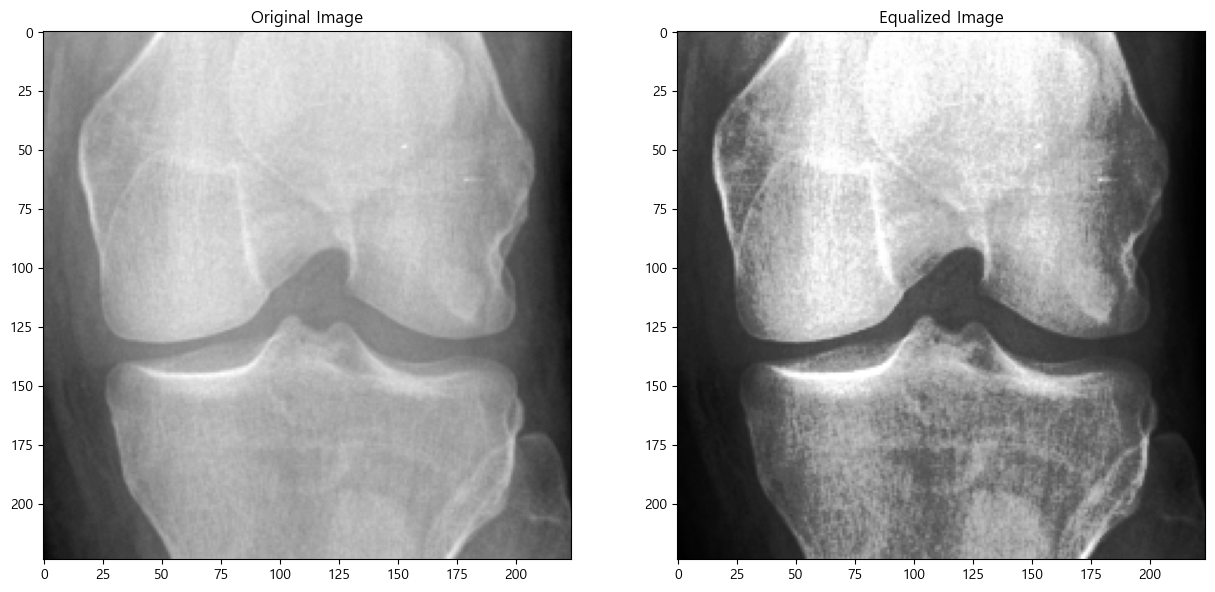

In [6]:
def equal_img(img):
    equal = cv2.equalizeHist(img)
    return equal

equal = equal_img(data[4])    
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(data[4], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equal, cmap='gray')
plt.title('Equalized Image')
plt.show()

CLAHE

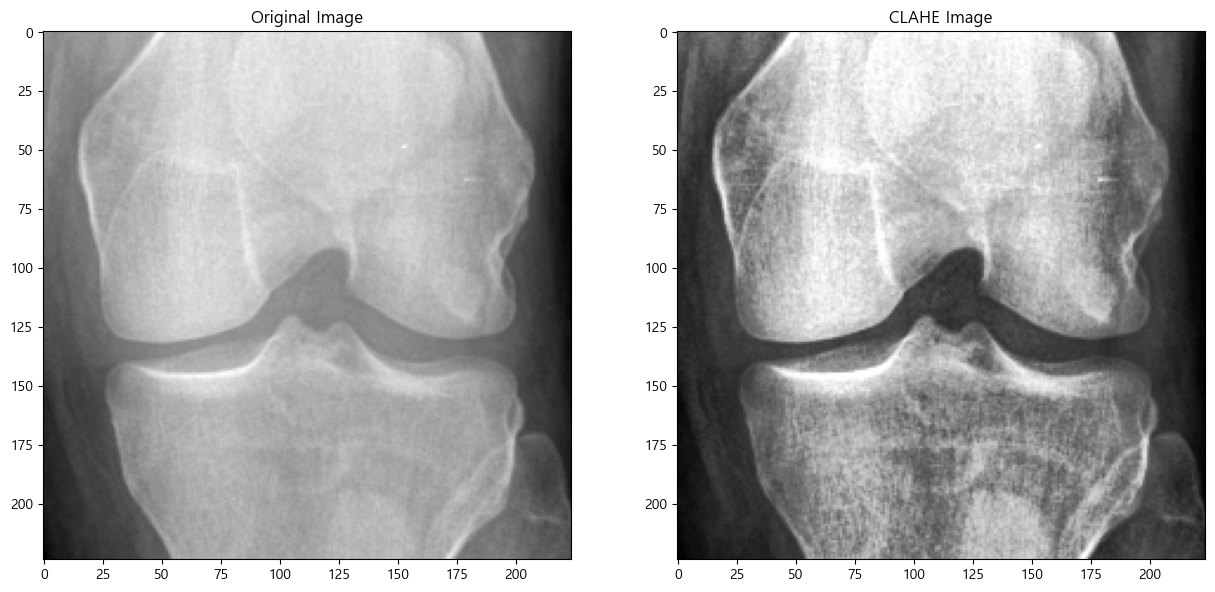

In [7]:
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img

cl_img=clahe_image(equal)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(data[4], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cl_img, cmap='gray')
plt.title('CLAHE Image')
plt.show()

임계값 (이진화)

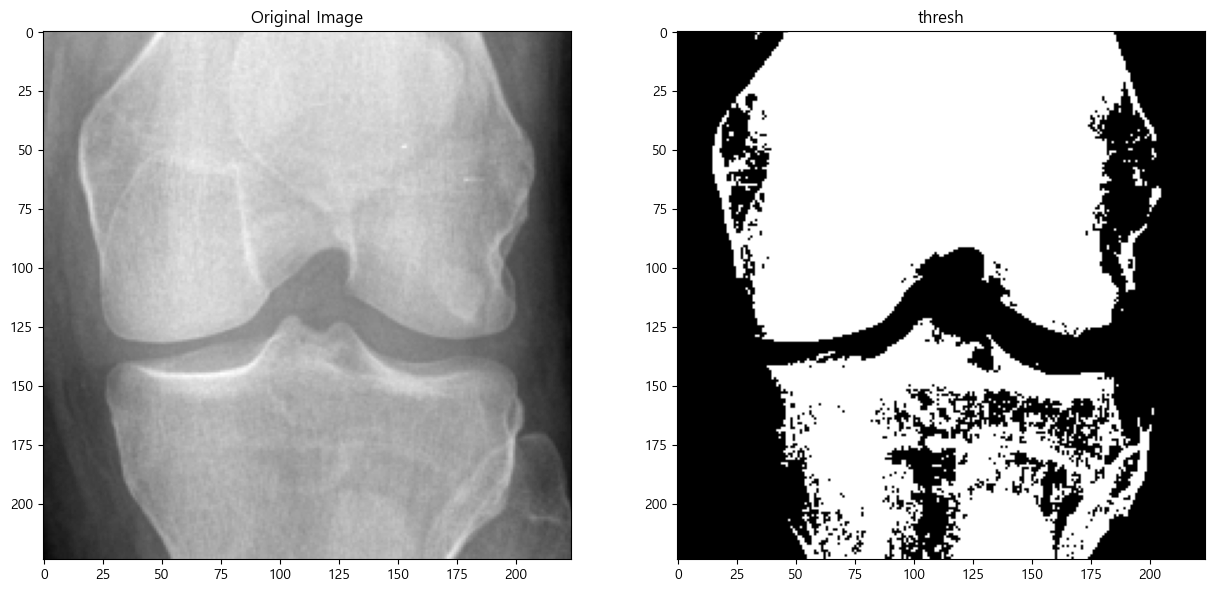

In [8]:
def thresh_img(img):
    ret, thresh = cv2.threshold(cl_img,127,255, cv2.THRESH_BINARY)
    return ret, thresh

ret, thresh = thresh_img(data[4])
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(data[4], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('thresh')
plt.show()

케니 엣지

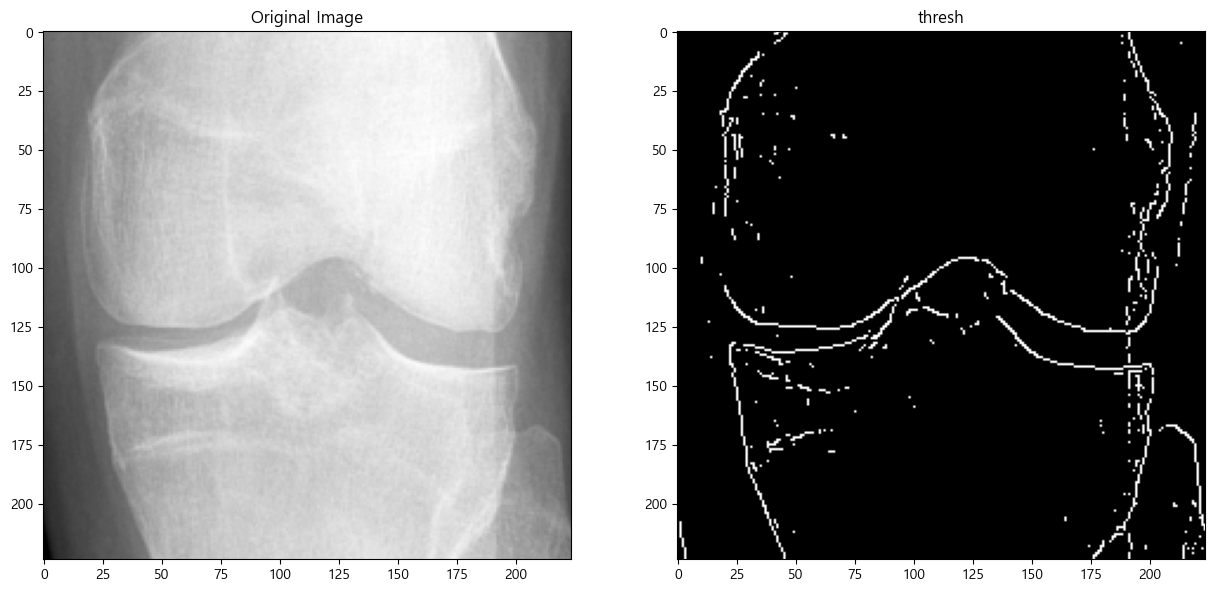

In [9]:
def canny_edge(img):
    edges = cv2.Canny(img, 80, 80)  # 수치 조절 - https://engineer-mole.tistory.com/243
    return edges

canny = canny_edge(data[1])
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(data[1], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('thresh')
plt.show()


노이즈

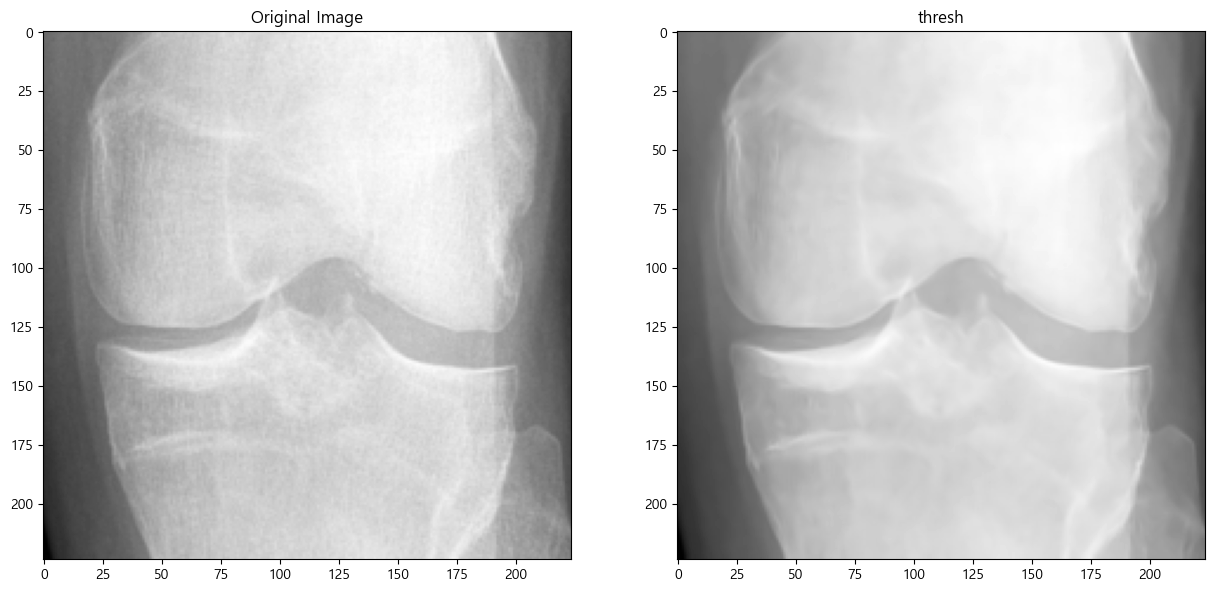

In [10]:
def denoised_img(img):
    denoised_img = cv2.fastNlMeansDenoising(img, None, 5, 5, 5)
    return denoised_img

deno_img = denoised_img(data[1])
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(data[1], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(deno_img, cmap='gray')
plt.title('thresh')
plt.show()


정규화

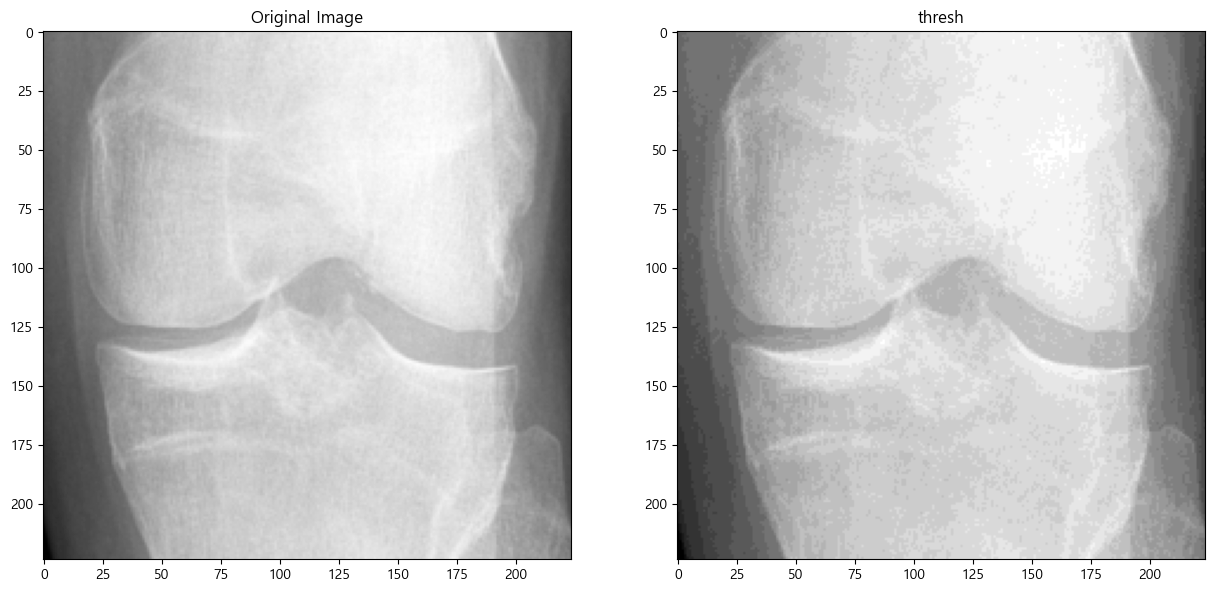

In [11]:
def normalize_img(img):
    norm_img = cv2.normalize(img, None, 100, 120, cv2.NORM_MINMAX)
    return norm_img

norm_img = normalize_img(data[1])
  
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(data[1],cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(norm_img, cmap='gray')
plt.title('thresh')
plt.show()


명암비

In [12]:
# def normalize_img(img):
#     alpha = 1 # 기울기
#     dst = np.clip((1 + alpha) * src - 128 * alpha), 0, 255).astype(np.unit8)
#     norm_img = ((1 + alpha) * src - 128 * alpha), 0, 255).astype(np.unit8)
#     return norm_img

# norm_img = normalize_img(data[1])
  
# plt.figure(figsize=(15,10))
# plt.subplot(1,2,1)
# plt.imshow(data[1],cmap='gray')
# plt.title('Original Image')
# plt.subplot(1, 2, 2)
# plt.imshow(norm_img, cmap='gray')
# plt.title('thresh')
# plt.show()

In [20]:
# import numpy as np
# from tensorflow.keras.utils import array_to_img
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# import cv2
# img_width = 224
# img_height = 130
# dataset = np.ndarray(shape=(len(data), img_height*img_width), dtype=np.float32)
# i=0
# for _file in dataset:
#     img = cv2.imread(_file, cv2.IMREAD_GRAYSCALE)
#     img_resized = cv2.resize(img, (img_width, img_height))
    
#     dataset[i] = img_resized.flatten()
#     i += 1
#     if i % 250 == 0:
#         print(f"{i} images to array")
# print("Done!")


datas

array([[ 89,  91,  93, ...,  85,  81,  76],
       [ 89,  91,  91, ...,  84,  79,  74],
       [ 90,  90,  92, ...,  83,  79,  76],
       ...,
       [ 68,  70,  74, ..., 109, 107, 106],
       [ 69,  71,  73, ..., 108, 105, 104],
       [ 68,  71,  73, ..., 108, 105, 104]], dtype=uint8)

In [13]:
from sklearn.model_selection import train_test_split

def load_data(data_dir):
    images = []
    labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)
    
    prepared_datas = np.array(images)
    return prepared_datas


datas = np.concatenate((data[0], data[1],data[2],data[3],data[4]))
print(load_data(data))
# X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

TypeError: listdir: path should be string, bytes, os.PathLike or None, not list

In [ ]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)   # 1:입력채널,  6:출력채널,  5:커널(필터) 크기
        self.pool = nn.MaxPool2d(2,2)   # (2,2) : 커널크기,스트라이드(보폭)
        self.conv2 = nn.Conv2d(6, 16, 5)  # 6:입력채널,  16:출력채널,  5:커널(필터) 크기
        self.fc1 = nn.Linear(16*4*4, 120) # 16*4*4 : 입력값,   120: 출력
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1,16*4*4)   # flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x